## **logistic regression**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the Dataset

#%%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_excel('/content/lung_disease.xlsx')

# Print the column names to help identify the correct ones
print("Columns in the dataset:", dataset.columns)




Columns in the dataset: Index(['Patient', 'smoke', 'FVC', 'FEC1', 'PEFR', 'O2', 'ABG-P-O2',
       'ABG-P-CO2', 'ABG-pH Level', 'Scan', 'Asthama', 'Other diseaes', 'AGE',
       'Risk'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        470 non-null    object 
 1   smoke          470 non-null    object 
 2   FVC            470 non-null    float64
 3   FEC1           470 non-null    float64
 4   PEFR           470 non-null    object 
 5   O2             470 non-null    object 
 6   ABG-P-O2       470 non-null    object 
 7   ABG-P-CO2      470 non-null    object 
 8   ABG-pH Level   470 non-null    object 
 9   Scan           470 non-null    object 
 10  Asthama        470 non-null    object 
 11  Other diseaes  470 non-null    object 
 12  AGE            470 non-null    int64  
 13  Risk           470 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 51.5+ KB


In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,F,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,F,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,F,T,F,T,T,X-ray,F,F,73,T


In [ ]:
dataset.tail()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
465,Patient-466,F,3.88,2.12,F,F,F,T,F,CT,F,F,63,F
466,Patient-467,F,3.76,3.12,F,F,F,F,F,X-ray,F,F,61,F
467,Patient-468,F,3.04,2.08,F,F,F,T,F,CT,F,F,52,F
468,Patient-469,F,1.96,1.68,F,F,F,T,T,MRI,F,F,79,F
469,Patient-470,F,4.72,3.56,F,F,F,F,F,MRI,F,F,51,F


In [ ]:
missing_values = dataset.isnull().sum()


print(missing_values)

Patient          0
smoke            0
FVC              0
FEC1             0
PEFR             0
O2               0
ABG-P-O2         0
ABG-P-CO2        0
ABG-pH Level     0
Scan             0
Asthama          0
Other diseaes    0
AGE              0
Risk             0
dtype: int64


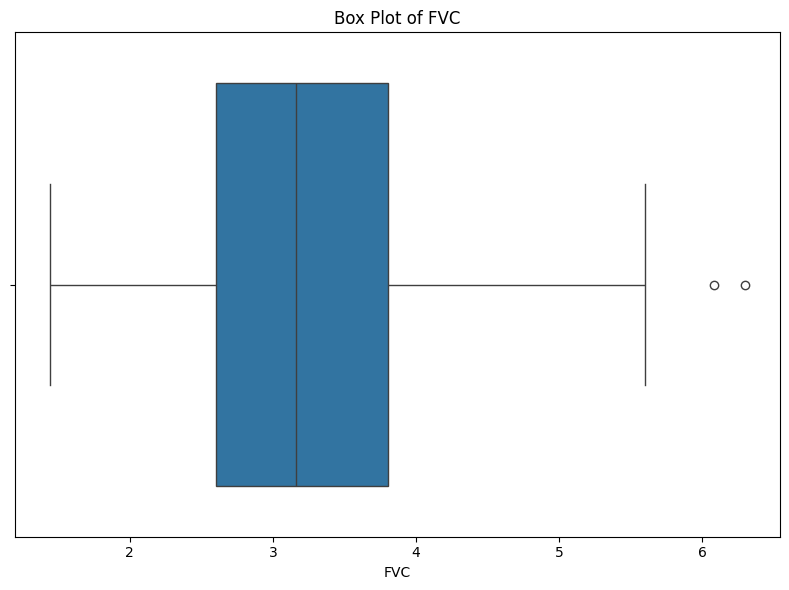

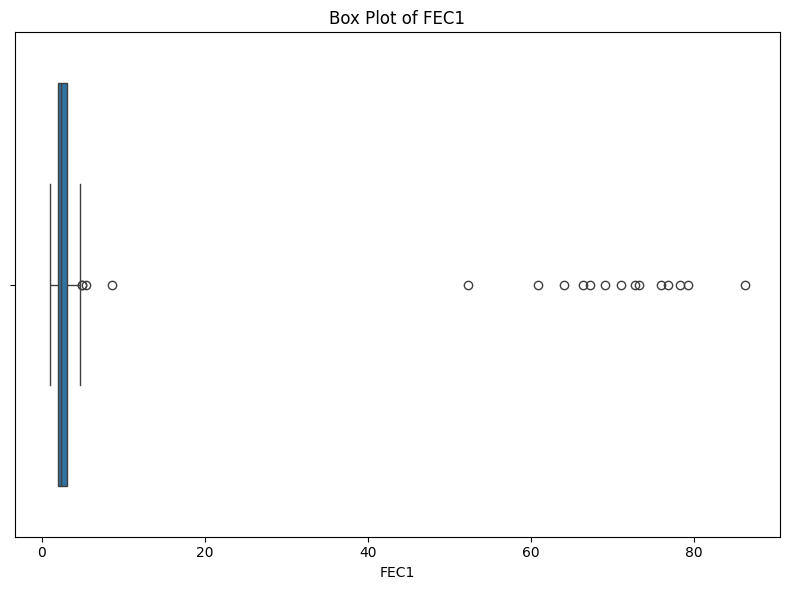

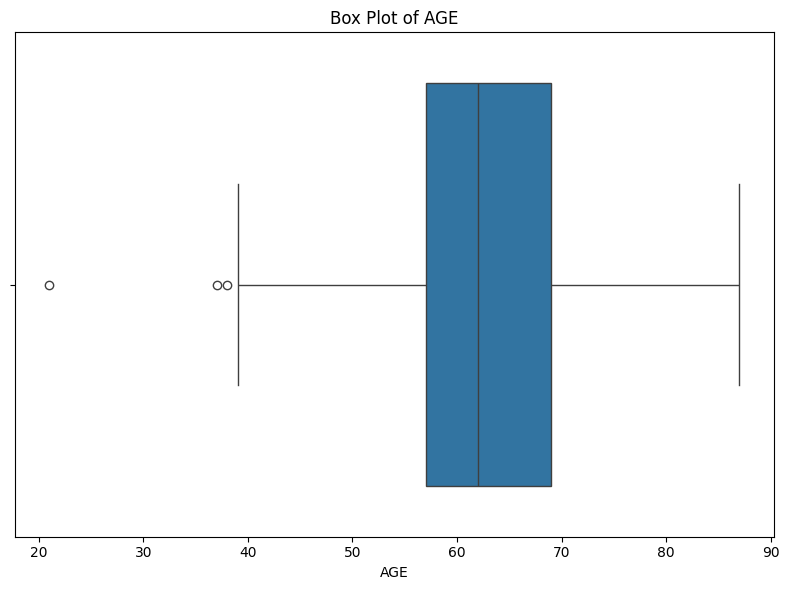

In [ ]:
numerical_features = dataset.select_dtypes(include=['number'])

for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [ ]:
def remove_outliers_iqr(dataset, column):
    """Removes outliers from a pandas DataFrame column using the IQR method.

    Args:
        data: pandas DataFrame.
        column: Name of the column to remove outliers from.

    Returns:
        pandas DataFrame with outliers removed.
    """

    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return data_filtered


for column in numerical_features.columns:
  data = remove_outliers_iqr(dataset, column)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        470 non-null    object 
 1   smoke          470 non-null    object 
 2   FVC            470 non-null    float64
 3   FEC1           470 non-null    float64
 4   PEFR           470 non-null    object 
 5   O2             470 non-null    object 
 6   ABG-P-O2       470 non-null    object 
 7   ABG-P-CO2      470 non-null    object 
 8   ABG-pH Level   470 non-null    object 
 9   Scan           470 non-null    object 
 10  Asthama        470 non-null    object 
 11  Other diseaes  470 non-null    object 
 12  AGE            470 non-null    int64  
 13  Risk           470 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 51.5+ KB


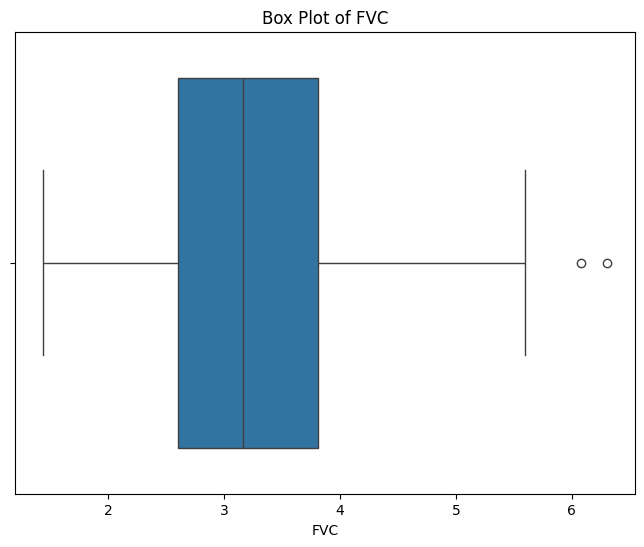

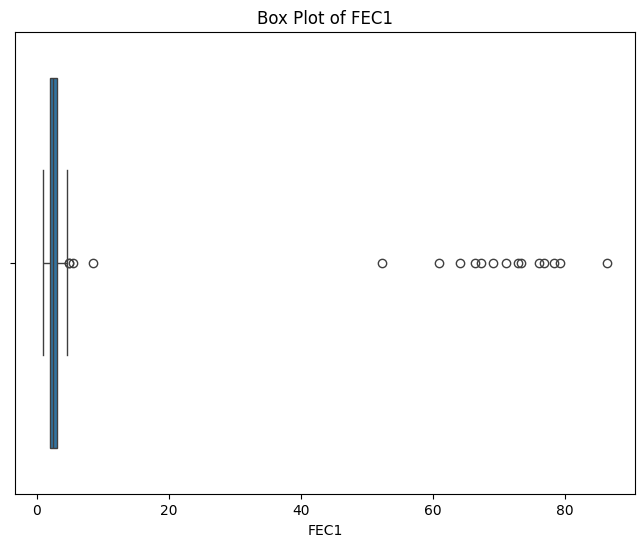

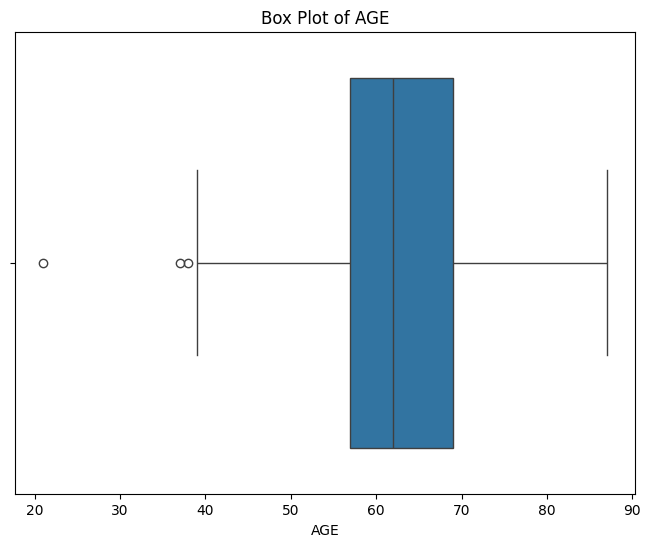

In [ ]:
numerical_features = dataset.select_dtypes(include=['number'])


for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

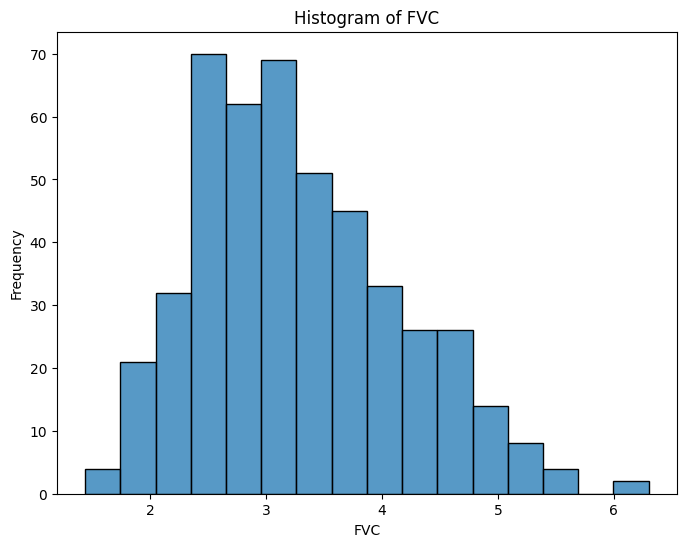

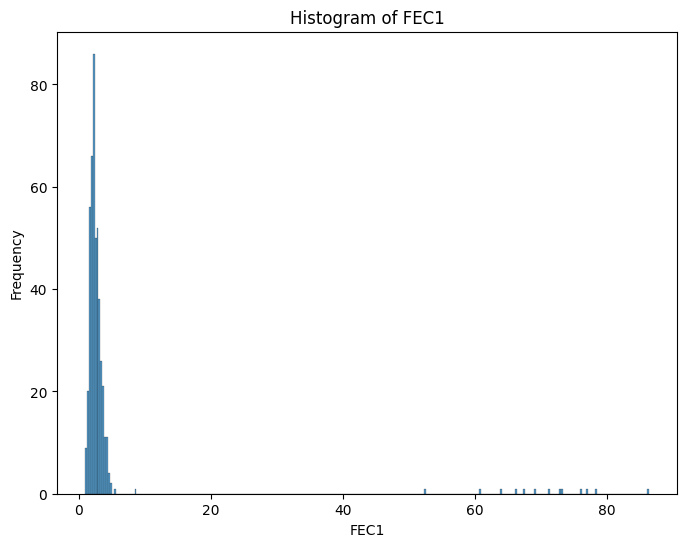

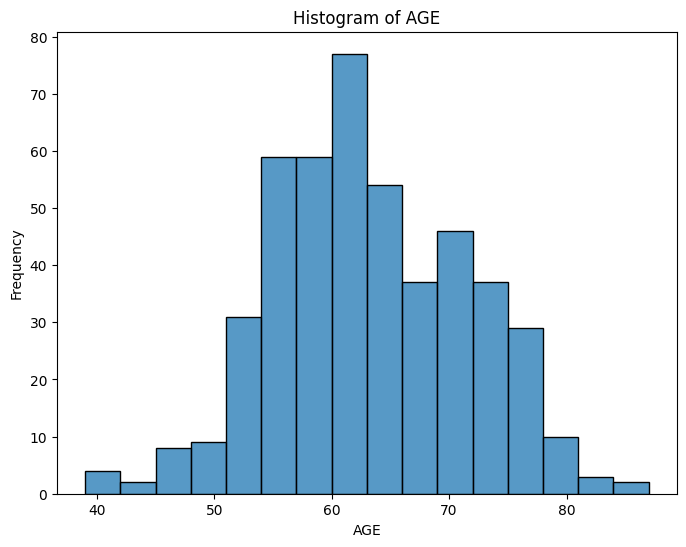

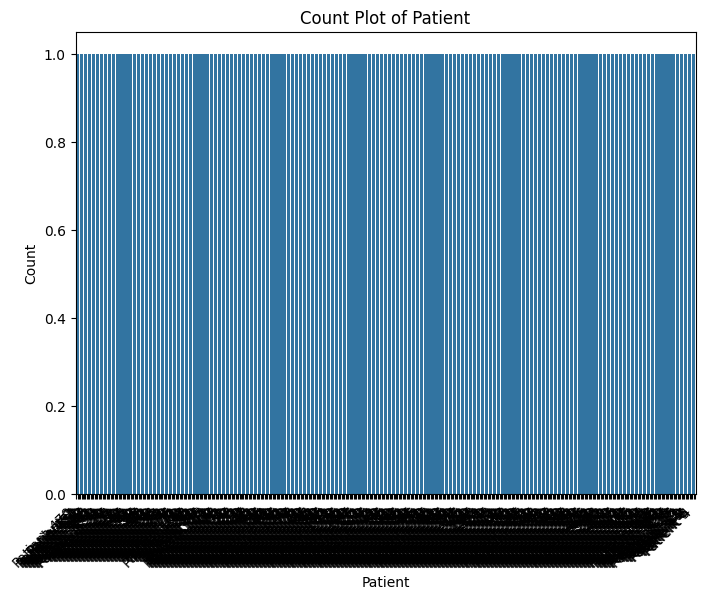

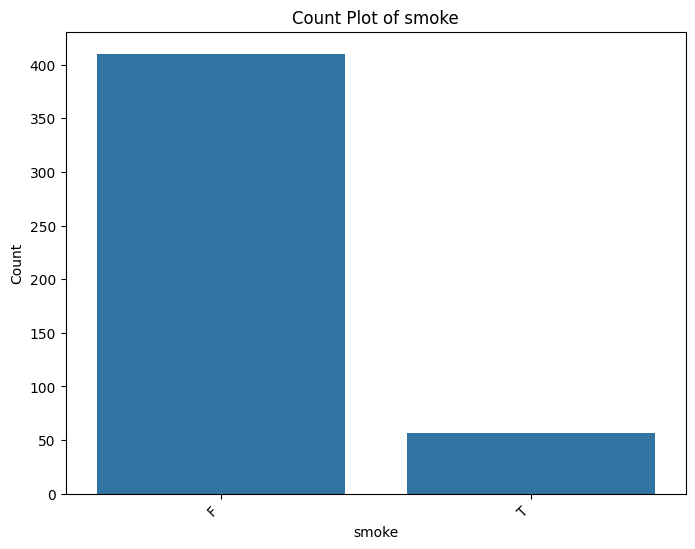

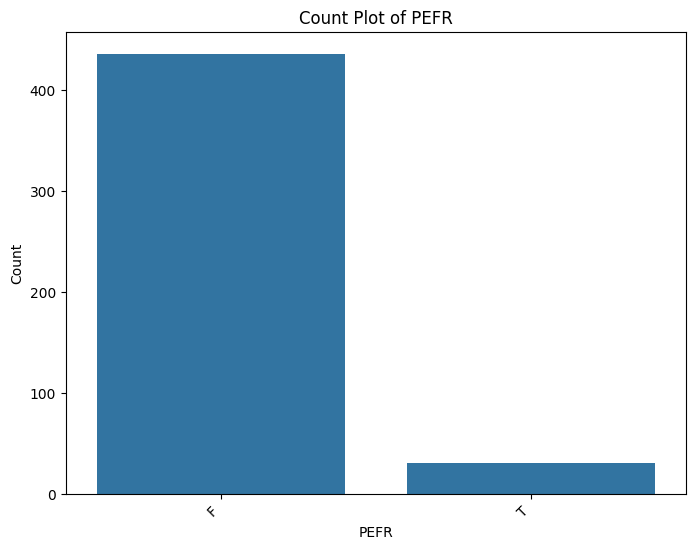

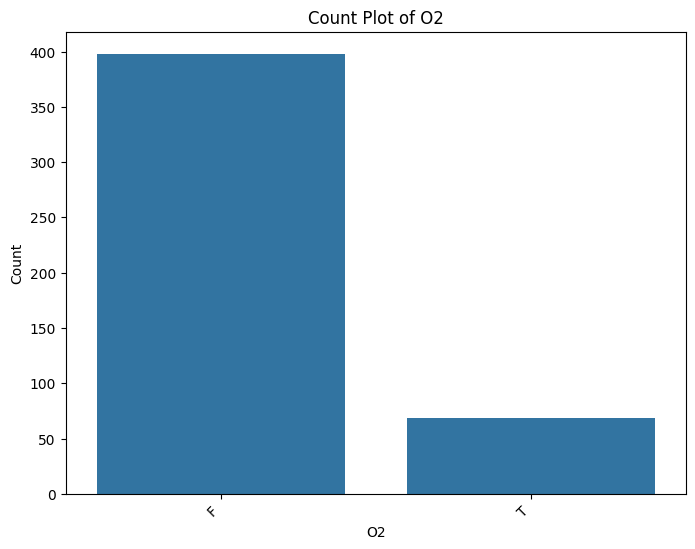

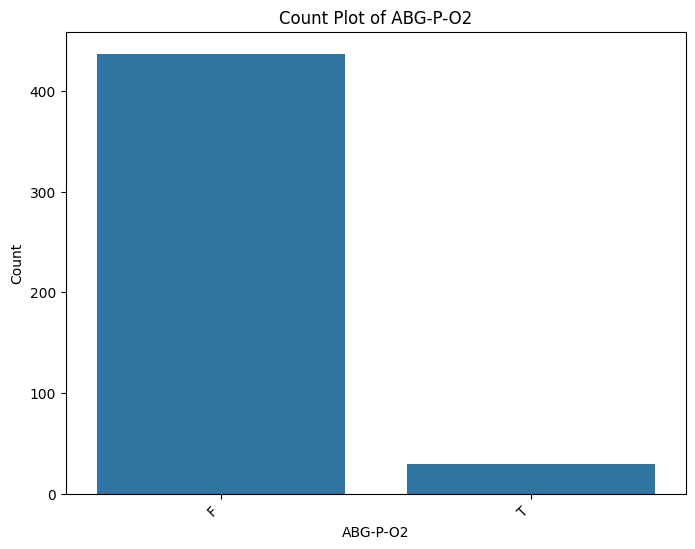

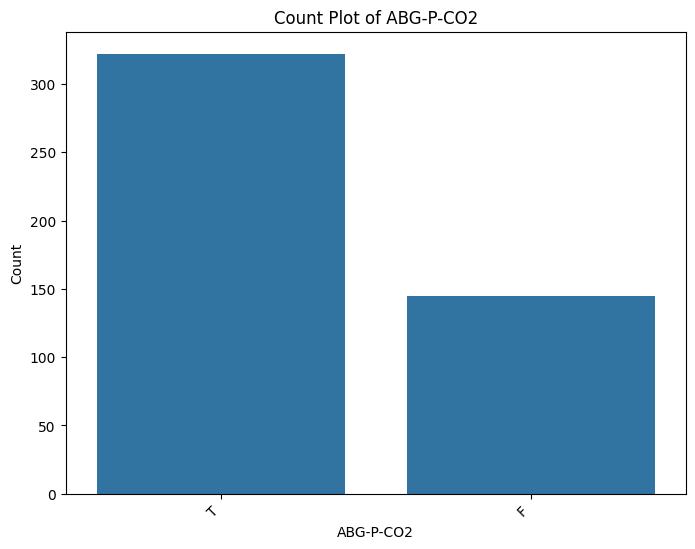

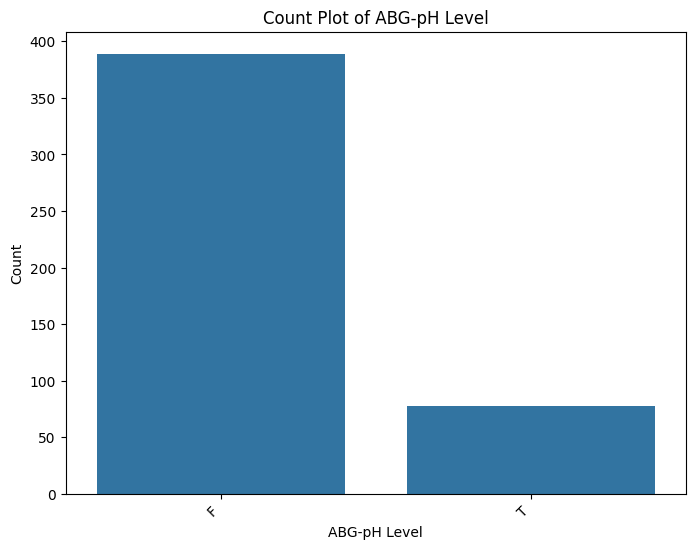

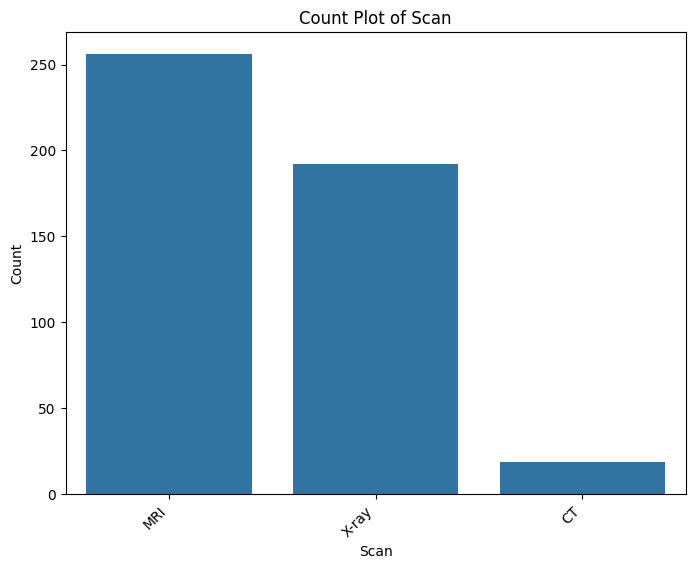

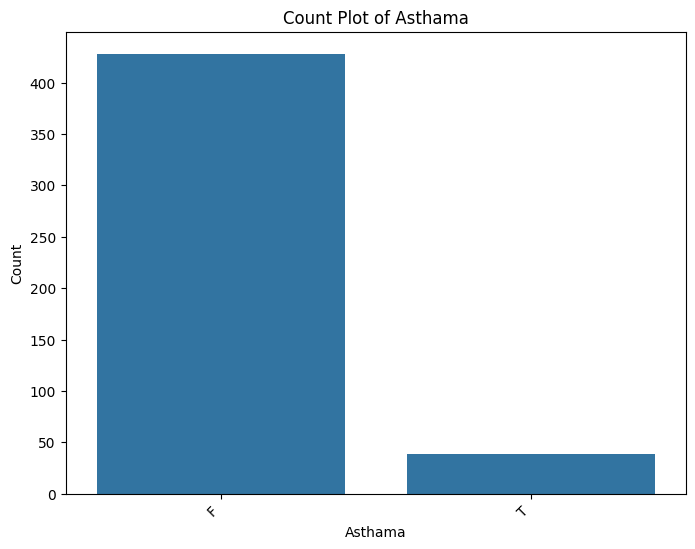

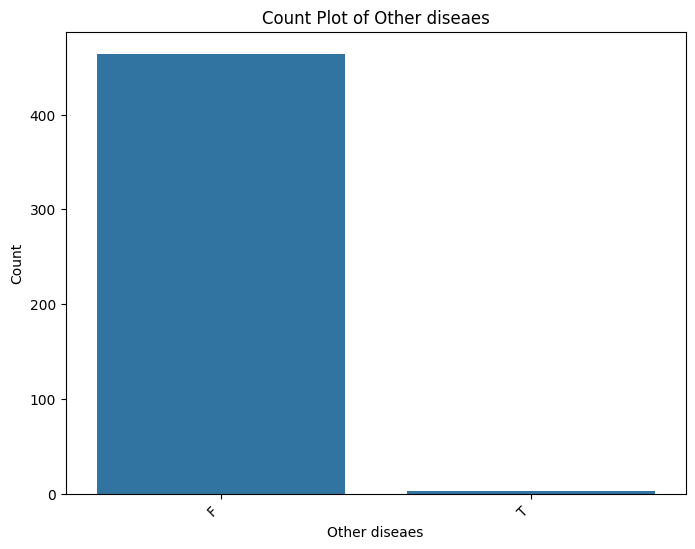

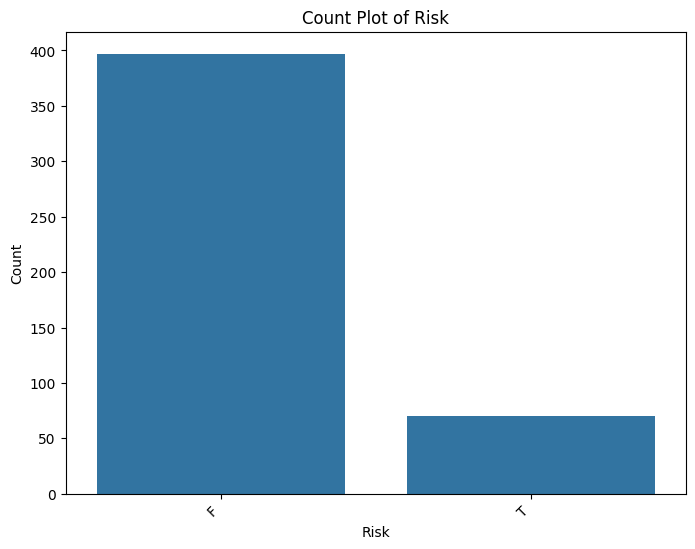

In [ ]:
numerical_features = data.select_dtypes(include=['number'])
for column in numerical_features.columns:
       plt.figure(figsize=(8, 6))
       sns.histplot(data[column])
       plt.title(f'Histogram of {column}')
       plt.xlabel(column)
       plt.ylabel('Frequency')
       plt.show()
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
       plt.figure(figsize=(8, 6))
       sns.countplot(x=data[column], order=data[column].value_counts().index)
       plt.title(f'Count Plot of {column}')
       plt.xlabel(column)
       plt.ylabel('Count')
       plt.xticks(rotation=45, ha='right')
       plt.show()

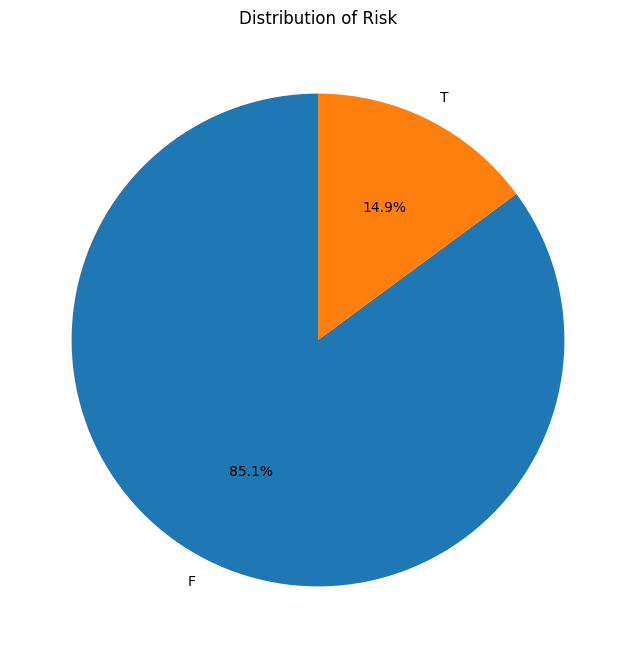

In [ ]:
risk_counts = dataset['Risk'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk')
plt.show()

In [ ]:
unique_PEFR = dataset['PEFR'].unique()


print(unique_PEFR)

['F' 'T']


In [ ]:
PEFR_mapping = {
    'T': 1,
    'F': 0,

}

dataset['PEFR'] = dataset['PEFR'].map(PEFR_mapping)



In [ ]:
# data = dataset.drop('PEFR', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,0,F,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,0,F,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,0,F,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,0,T,F,T,T,X-ray,F,F,73,T


In [ ]:
unique_O2 = dataset['O2'].unique()


print(unique_O2)

['F' 'T']


In [ ]:
O2_mapping = {
    'T': 1,
    'F': 0,

}

dataset['O2'] = dataset['O2'].map(O2_mapping)

In [ ]:
# data = dataset.drop('O2', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,0,0,F,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,0,0,F,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,0,0,F,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,0,1,F,T,T,X-ray,F,F,73,T


In [ ]:
unique_ABG_P_O2 = dataset['ABG-P-O2'].unique()


print(unique_ABG_P_O2)

['F' 'T']


In [ ]:
ABG_P_O2_mapping = {
    'T': 1,
    'F': 0,

}

dataset['ABG-P-O2'] = dataset['ABG-P-O2'].map(ABG_P_O2_mapping)

In [ ]:
# data = dataset.drop('ABG-P-O2', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,0,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,0,0,0,F,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,0,0,0,T,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,0,0,0,F,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,0,1,0,T,T,X-ray,F,F,73,T


In [ ]:
unique_ABG_P_CO2 = dataset['ABG-P-CO2'].unique()


print(unique_ABG_P_CO2)

['T' 'F']


In [ ]:
ABG_P_CO2_mapping = {
    'T': 1,
    'F': 0,

}

dataset['ABG-P-CO2'] = dataset['ABG-P-CO2'].map(ABG_P_CO2_mapping)

In [ ]:
# data = dataset.drop('ABG-P-O2', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,0,1,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,0,0,0,0,F,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,0,0,0,1,F,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,0,0,0,0,F,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,0,1,0,1,T,X-ray,F,F,73,T


In [ ]:
unique_ABG_pHLEVEL = dataset['ABG-pH Level'].unique()


print(unique_ABG_pHLEVEL)

['T' 'F']


In [ ]:
ABG_pH_Level_mapping = {
    'T': 1,
    'F': 0,

}

dataset['ABG-pH Level'] = dataset['ABG-pH Level'].map(ABG_pH_Level_mapping)

In [ ]:
# data = dataset.drop('ABG-P-O2', axis=1) # This line should be removed
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,0,1,1,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,0,0,0,0,0,MRI,T,F,51,F
2,Patient-3,F,2.76,2.08,0,0,0,1,0,X-ray,F,F,59,F
3,Patient-4,F,3.68,3.04,0,0,0,0,0,X-ray,F,F,54,F
4,Patient-5,F,2.44,0.96,0,1,0,1,1,X-ray,F,F,73,T


In [ ]:
unique_Scan = dataset['Scan'].unique()


print(unique_Scan)

['X-ray' 'MRI' 'CT']


In [ ]:
Scan_mapping = {
    'X-ray': 0,
    'MRI': 1,
    'CT': 2,

}

dataset['Scan'] = dataset['Scan'].map(Scan_mapping)

In [ ]:
# data = dataset.drop('ABG-P-O2', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,0,1,1,0,F,F,60,F
1,Patient-2,F,3.40,1.88,0,0,0,0,0,1,T,F,51,F
2,Patient-3,F,2.76,2.08,0,0,0,1,0,0,F,F,59,F
3,Patient-4,F,3.68,3.04,0,0,0,0,0,0,F,F,54,F
4,Patient-5,F,2.44,0.96,0,1,0,1,1,0,F,F,73,T


In [ ]:
unique_Asthama = dataset['Asthama'].unique()


print(unique_Asthama)

['F' 'T']


In [ ]:
Asthama_mapping = {
    'T': 1,
    'F': 0,

}

dataset['Asthama'] = dataset['Asthama'].map(Asthama_mapping)

In [ ]:
# data = dataset.drop('Asthama', axis=1) # This line should be removed

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,0,0,0,1,1,0,0,F,60,F
1,Patient-2,F,3.40,1.88,0,0,0,0,0,1,1,F,51,F
2,Patient-3,F,2.76,2.08,0,0,0,1,0,0,0,F,59,F
3,Patient-4,F,3.68,3.04,0,0,0,0,0,0,0,F,54,F
4,Patient-5,F,2.44,0.96,0,1,0,1,1,0,0,F,73,T


In [ ]:
unique_Other_diseases = dataset['Other diseaes'].unique()


print(unique_Other_diseases)

['F' 'T']


In [ ]:
unique_Other_diseases_mapping = {
    'T': 1,
    'F': 0,

}

dataset['Other_diseaes'] = dataset['Other diseaes'].map(unique_Other_diseases_mapping)

In [ ]:
dataset = dataset.drop('Other diseaes', axis=1)

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,AGE,Risk,Other_diseaes
0,Patient-1,T,2.85,2.16,0,0,0,1,1,0,0,60,F,0
1,Patient-2,F,3.40,1.88,0,0,0,0,0,1,1,51,F,0
2,Patient-3,F,2.76,2.08,0,0,0,1,0,0,0,59,F,0
3,Patient-4,F,3.68,3.04,0,0,0,0,0,0,0,54,F,0
4,Patient-5,F,2.44,0.96,0,1,0,1,1,0,0,73,T,0


In [ ]:
unique_Risk = dataset['Risk'].unique()


print(unique_Risk)

['F' 'T']


In [ ]:
Risk_mapping = {
    'T': 1,
    'F': 0,

}

dataset['Risk'] = dataset['Risk'].map(Risk_mapping)

In [ ]:
# dataset = dataset.drop('Risk', axis=1)

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,AGE,Risk,Other_diseaes
0,Patient-1,T,2.85,2.16,0,0,0,1,1,0,0,60,0,0
1,Patient-2,F,3.40,1.88,0,0,0,0,0,1,1,51,0,0
2,Patient-3,F,2.76,2.08,0,0,0,1,0,0,0,59,0,0
3,Patient-4,F,3.68,3.04,0,0,0,0,0,0,0,54,0,0
4,Patient-5,F,2.44,0.96,0,1,0,1,1,0,0,73,1,0


In [ ]:
unique_smoke = dataset['smoke'].unique()


print(unique_smoke)

['T' 'F']


In [ ]:
smoke_mapping = {
    'T': 1,
    'F': 0,

}

dataset['smoke'] = dataset['smoke'].map(Risk_mapping)

In [ ]:
dataset.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,AGE,Risk,Other_diseaes
0,Patient-1,1,2.85,2.16,0,0,0,1,1,0,0,60,0,0
1,Patient-2,0,3.40,1.88,0,0,0,0,0,1,1,51,0,0
2,Patient-3,0,2.76,2.08,0,0,0,1,0,0,0,59,0,0
3,Patient-4,0,3.68,3.04,0,0,0,0,0,0,0,54,0,0
4,Patient-5,0,2.44,0.96,0,1,0,1,1,0,0,73,1,0


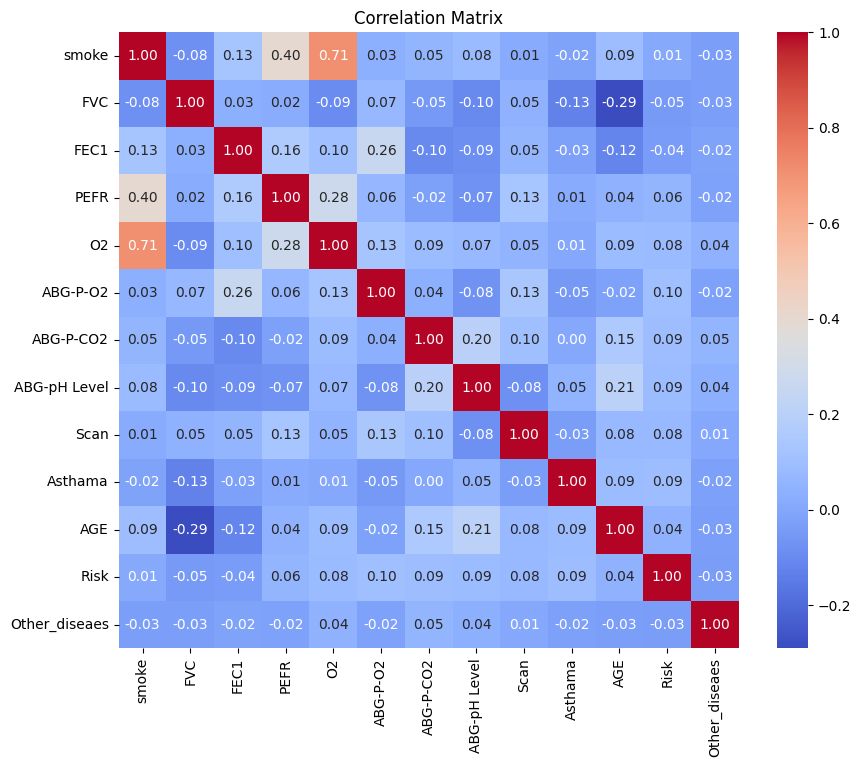

In [ ]:
correlation_matrix = dataset.drop('Patient', axis=1).corr()

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Accuracy (Logistic Regression with L1): 0.7978723404255319
Precision (Logistic Regression with L1): 0.6366002716161159
Recall (Logistic Regression with L1): 0.7978723404255319
F1-score (Logistic Regression with L1): 0.7081707163540224
Confusion Matrix (Logistic Regression with L1):
[[75  0]
 [19  0]]


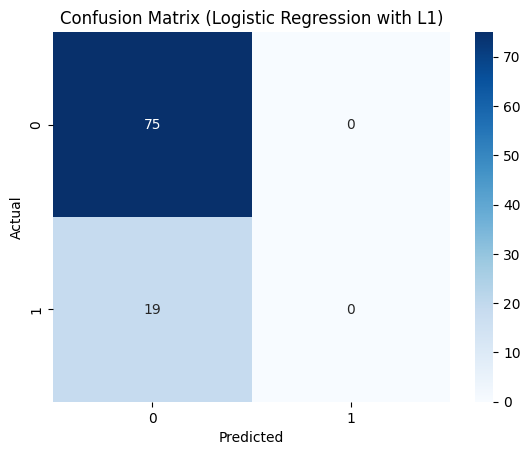

In [ ]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X_train, y_train)


y_pred_logreg_l1 = logreg_l1.predict(X_test)


accuracy_logreg_l1 = accuracy_score(y_test, y_pred_logreg_l1)
precision_logreg_l1 = precision_score(y_test, y_pred_logreg_l1, average='weighted')
recall_logreg_l1 = recall_score(y_test, y_pred_logreg_l1, average='weighted')
f1_logreg_l1 = f1_score(y_test, y_pred_logreg_l1, average='weighted')


print(f"Accuracy (Logistic Regression with L1): {accuracy_logreg_l1}")
print(f"Precision (Logistic Regression with L1): {precision_logreg_l1}")
print(f"Recall (Logistic Regression with L1): {recall_logreg_l1}")
print(f"F1-score (Logistic Regression with L1): {f1_logreg_l1}")


cm_logreg_l1 = confusion_matrix(y_test, y_pred_logreg_l1)
print("Confusion Matrix (Logistic Regression with L1):")
print(cm_logreg_l1)


sns.heatmap(cm_logreg_l1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression with L1)")
plt.show()

Accuracy (Logistic Regression with L2): 0.7978723404255319
Precision (Logistic Regression with L2): 0.6366002716161159
Recall (Logistic Regression with L2): 0.7978723404255319
F1-score (Logistic Regression with L2): 0.7081707163540224
Confusion Matrix (Logistic Regression with L2):
[[75  0]
 [19  0]]


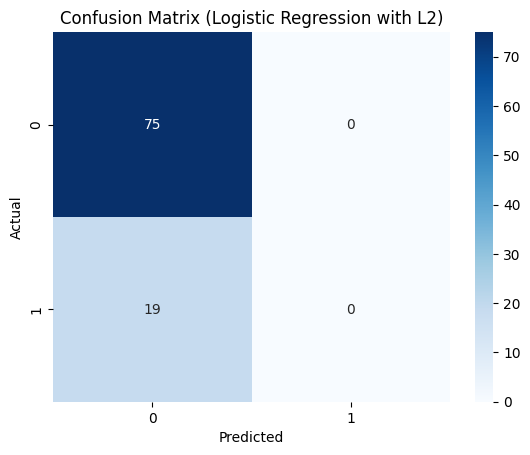

In [ ]:

logreg_l2 = LogisticRegression(penalty='l2')
logreg_l2.fit(X_train, y_train)


y_pred_logreg_l2 = logreg_l2.predict(X_test)


accuracy_logreg_l2 = accuracy_score(y_test, y_pred_logreg_l2)
precision_logreg_l2 = precision_score(y_test, y_pred_logreg_l2, average='weighted')
recall_logreg_l2 = recall_score(y_test, y_pred_logreg_l2, average='weighted')
f1_logreg_l2 = f1_score(y_test, y_pred_logreg_l2, average='weighted')


print(f"Accuracy (Logistic Regression with L2): {accuracy_logreg_l2}")
print(f"Precision (Logistic Regression with L2): {precision_logreg_l2}")
print(f"Recall (Logistic Regression with L2): {recall_logreg_l2}")
print(f"F1-score (Logistic Regression with L2): {f1_logreg_l2}")


cm_logreg_l2 = confusion_matrix(y_test, y_pred_logreg_l2)
print("Confusion Matrix (Logistic Regression with L2):")
print(cm_logreg_l2)

sns.heatmap(cm_logreg_l2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression with L2)")
plt.show()